In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import xgboost as xgb


In [3]:
data = pd.read_csv('cleanedData.csv')
print(data.shape)
data.head()

(2930, 76)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,HasFence
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,NoFence,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,120,MnPrv,0,6,2010,WD,Normal,105000,1
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,NoFence,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,NoFence,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,MnPrv,0,3,2010,WD,Normal,189900,1


In [4]:
X, y = data.drop("SalePrice", axis = 'columns'), data['SalePrice']
X.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,HasFence
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,NoFence,0,5,2010,WD,Normal,0
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,MnPrv,0,6,2010,WD,Normal,1
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,NoFence,12500,6,2010,WD,Normal,0
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,NoFence,0,4,2010,WD,Normal,0
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,3,2010,WD,Normal,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

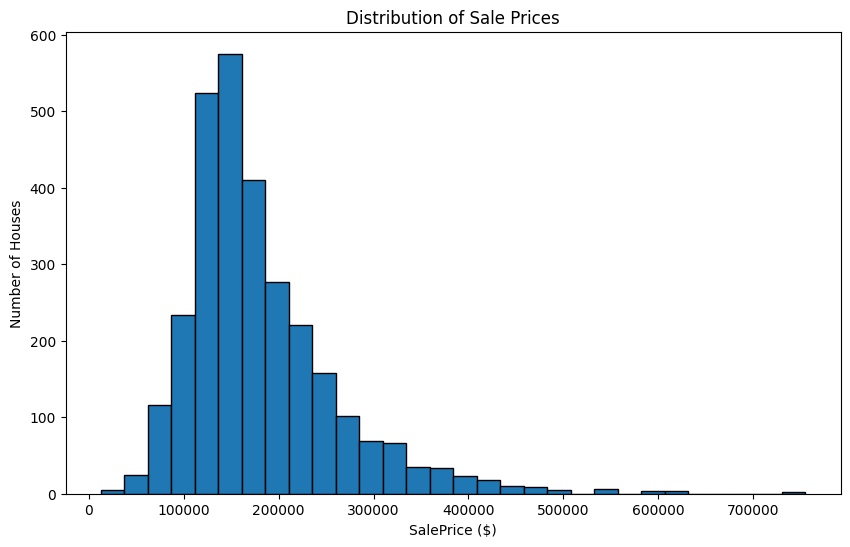

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data['SalePrice'], bins=30, edgecolor='black')
plt.title("Distribution of Sale Prices")
plt.xlabel("SalePrice ($)")
plt.ylabel("Number of Houses")
plt.show()

In [8]:
data['SalePrice'].value_counts()

SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
164990     1
117250     1
97900      1
35000      1
138887     1
Name: count, Length: 1032, dtype: int64

ideal ar fi sa avem pana in 100 de instante in fiecare bin (30 bins cu numar aproape egal de instante)
sau mai mare/mic decat media?
sau poate trebuie dupa distributia in 30 de bins facuta in graficul de deasupra?

In [9]:
total = 0 
bins = 0
lims = [] #limita superioara = valori pana la ....
frequency = [] #numarul de valori pana la limita superioara corespunzatoare
for i, j in data['SalePrice'].value_counts().items():
    if total + j > 100:
        bins += 1 
        lims.append(str(i))
        frequency.append(total)
        total = j
    else:
        total = total + j

print(bins)
print(lims)

30
['155000', '110000', '120000', '180000', '250000', '100000', '124000', '260000', '133000', '122000', '213000', '80000', '169000', '162000', '87000', '165500', '350000', '82500', '184500', '164500', '137900', '277000', '123900', '155900', '446261', '93850', '356000', '267916', '356383', '250764']


<BarContainer object of 30 artists>

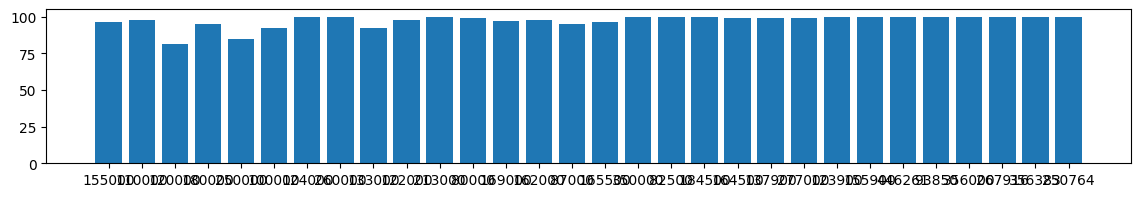

In [10]:

plt.figure(figsize=(14, 2))
display(plt.bar(np.array(lims), np.array(frequency)))

In [11]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(
X, y, test_size=0.1, random_state=42)
X_test10.shape

(293, 75)

In [12]:
model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

model.fit(X_train10, y_train10) #rezolv imediat, tb clase

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593
 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611
 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665
 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683
 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701
 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719
 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737
 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755
 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773
 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791
 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809
 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827
 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845
 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863
 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881
 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899
 900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917
 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935
 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953
 954 955 956 957 958 959 960], got [ 12789  13100  34900  35000  35311  37900  39300  40000  45000  46500
  50138  51689  52000  52500  55000  55993  57625  58500  60000  61000
  61500  62383  62500  63000  63900  64000  64500  65000  67000  67500
  68000  68104  68400  68500  70000  71000  72000  72500  73000  75000
  75200  75500  76000  76500  78000  78500  79000  79275  79400  79500
  79900  80000  80400  80500  80900  81000  81300  81400  81500  82000
  82375  82500  83000  83500  84000  84500  84900  85000  85400  85500
  86000  86900  87000  87500  87550  88000  89000  89500  89900  90000
  90350  90500  91000  91300  91500  91900  92000  93000  93369  93500
  93850  93900  94000  94500  94550  94750  94900  95000  95541  96000
  96500  96900  97000  97500  97900  98000  98500  98600  99000  99500
  99600  99800  99900 100000 100500 101000 101800 102000 102776 102900
 103000 103200 103400 103500 103600 104000 104500 104900 105000 105500
 105900 106000 106500 106900 107000 107400 107500 107900 108000 108480
 108500 108538 109000 109008 109500 109900 110000 110500 111000 111250
 111500 111750 111900 112000 112500 112900 113000 113500 113700 113722
 114000 114500 114504 114900 115000 115400 116000 116050 116500 116900
 117000 117500 117600 118000 118400 118500 118858 118900 118964 119000
 119164 119200 119500 119600 119750 119900 119916 120000 120500 120750
 120875 121000 121500 121600 122000 122250 122500 122600 122900 123000
 123500 123900 124000 124100 124400 124500 124900 125000 125200 125500
 125600 125900 126000 126175 126500 127000 127500 128000 128200 128250
 128500 128600 128900 128950 129000 129200 129250 129400 129500 129800
 129900 130000 130250 130500 131000 131250 131400 131500 131750 131900
 132000 132250 132500 133000 133500 133700 133900 134000 134432 134450
 134500 134800 134900 135000 135500 135750 135900 135960 136000 136300
 136500 136870 136900 136905 137000 137250 137450 137500 137900 138000
 138400 138500 138887 139000 139400 139500 139600 139900 139950 140000
 140200 140500 140750 141000 141500 142000 142100 142125 142250 142500
 142600 142900 142953 143000 143195 143250 143450 143500 143750 143900
 144000 144100 144152 144500 144750 144800 144900 145000 145100 145250
 145400 145500 145900 146000 146300 146500 146800 146900 147000 147110
 147400 147500 147900 147983 148000 148325 148400 148500 148800 149000
 149300 149350 149500 149700 149900 150000 150500 150750 150900 150909
 151000 151400 151500 152000 152400 152500 153000 153337 153500 153575
 153600 153900 154000 154204 154300 154400 154500 154900 155000 155500
 155835 155891 155900 156000 156450 156500 156820 157000 157500 157900
 158000 158450 158500 158900 159000 159434 159500 159895 159900 159950
 160000 160200 160250 160500 161000 161500 161750 161900 162000 162500
 162900 163000 163500 163900 163990 164000 164500 164700 164900 164990
 165000 165150 165250 165400 165500 165600 166000 166500 166800 167000
 167240 167300 167500 167800 167840 167900 168000 168165 168500 168675
 169000 169500 169900 169990 170000 170440 171000 171500 171750 171900
 171925 172000 172400 172500 172785 172900 173000 173500 173733 174000
 174500 174850 174900 175000 175500 175900 176000 176400 176432 176500
 177000 177500 177625 177900 178000 178400 178740 178750 178900 179000
 179200 179400 179500 179540 179600 179665 179781 179900 180000 180400
 180500 181000 181134 181316 181500 181755 181900 182000 182900 183000
 183200 183500 183600 183850 183900 184000 184500 184900 185000 185088
 185101 185485 185500 185850 185900 186000 186500 186700 186800 187000
 187100 187500 187687 187750 188000 188500 188700 188900 189000 189500
 189900 189950 190000 190500 191000 191500 191750 192000 192100 192140
 192350 192500 193000 193500 193800 193879 194000 194201 194500 194700
 195000 195400 195500 195800 196000 196500 197000 197500 197600 197900
 198000 198444 198500 198600 199000 199500 199900 200000 200100 200141
 200500 200624 200825 201000 201490 201800 202000 202500 202665 202900
 203000 203135 204000 204750 204900 205000 205950 206000 206300 206580
 206900 207000 207500 208000 208300 208500 208900 209000 209200 209500
 209700 210000 210250 210400 211000 211500 212000 212109 212300 212500
 212700 212900 212999 213000 213250 213490 213500 213750 214000 214500
 214900 215000 215200 216000 216500 216837 217000 217300 217500 218000
 218500 218689 218836 219210 219500 219990 220000 221000 221300 221370
 221500 221800 222000 222500 223000 223500 224000 224243 224500 224900
 225000 226000 226001 226500 227000 227875 228000 228500 228950 229000
 229456 229800 230000 230348 230500 231000 231500 231713 232000 232500
 232600 232698 233000 233170 233230 233500 233555 234000 234250 234500
 235000 235500 235876 236000 236500 237000 237500 238000 238500 239000
 239500 239686 239799 239900 240000 240050 240900 241000 241500 241600
 242000 242500 243000 243500 244000 244400 245000 245350 245500 246000
 246578 246990 247000 248000 248328 248500 248900 249000 249700 250000
 250580 250764 251000 252000 252678 253000 253293 254000 254750 254900
 255000 255500 256000 256300 256900 257000 257076 257500 258000 259000
 259500 260000 260116 260261 260400 261329 261500 262000 262280 262500
 263000 263435 263550 264561 264966 265000 265900 265979 266000 266500
 267000 267300 267916 268000 268500 269500 269790 270000 271000 271500
 271900 272000 272500 274000 274300 274725 274970 275000 275500 277000
 277500 278000 279000 279500 279700 279900 280000 280750 281000 281213
 281500 282000 282500 282922 283463 284000 284500 284700 285000 286000
 287000 287090 287500 287602 289000 290000 290941 291000 292500 293000
 293077 293200 294000 294323 294464 294900 295000 295493 296000 297000
 297900 298236 298751 299800 300000 301000 301500 301600 302000 305000
 305900 306000 308030 309000 310000 310013 310090 311500 311872 312500
 313000 314813 315000 315500 315750 316000 316500 316600 317000 317500
 318000 318061 318750 319500 319900 320000 321000 322400 322500 323262
 324000 325000 325300 325624 326000 327000 328000 328900 329900 330000
 332000 332200 333168 334000 335000 336000 336820 336860 337000 338931
 339750 340000 341000 342000 344133 345000 345474 348000 349265 350000
 354000 355000 356000 356383 359100 359900 360000 361919 362500 367294
 369900 370000 370878 370967 372000 372397 372402 372500 373000 374000
 375000 376162 377426 377500 378000 379000 380000 381000 382500 383000
 383970 384500 385000 386250 387000 392000 394432 394617 395000 395192
 398800 401179 402000 404000 405000 405749 410000 412083 412500 415000
 417500 418000 421250 423000 424870 425000 426000 430000 437154 438780
 440000 441929 445000 450000 451950 455000 457347 460000 462000 465000
 466500 468000 470000 475000 479069 485000 500000 500067 535000 538000
 545224 552000 555000 556581 582933 584500 591587 610000 615000 745000
 755000]

In [ ]:
X_train20, X_test20, y_train20, y_test20 = train_test_split(
X, y, test_size=0.2, random_state=42)
X_test20.shape

(586, 75)

In [20]:
lims_numeric = sorted([int(x) for x in lims])
lims_numeric.append(int(data['SalePrice'].max() + 1))
y_class = pd.cut(data['SalePrice'], bins=[0]+lims_numeric, labels=False, include_lowest=True)
y_class = y_class.astype(int)


In [21]:
X_numeric = pd.get_dummies(X, drop_first=True) 
X_train10, X_test10, y_train10, y_test10 = train_test_split(
    X_numeric, y_class, test_size=0.1, random_state=42
)

In [24]:
model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax'
)

model.fit(X_train10, y_train10)

,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [25]:
y_pred = model.predict(X_test10)
print("Predictions:", y_pred)

Predictions: [11  6 21 10  6 18 12 12  2 29 21 21  0 12 12 12 12 20 10 12 20 16 20 20
 20 26 26 21 20 19 18  0 21  5 12  4 18 26 20 20 29 21 21 20  6 26 18 12
 18 10 20 12  6 12 20 20 21 12 21 12  0 12  1 26 21 20  6 20 18 18 21 20
 26  0 12 29 12 21 18 20 14 12  6 20 26 20  6 12 20 30 20  0 12  0 20 18
  0 21 21 26 12 21 30 26 21 12 26 21 20  6 21 10  6  4 20 10 21 21 21 18
 10 10 10 10  6 30 12 21 18 21  5 17 18 10 26 21 12 12 26 21 20 21 18 20
 12  6 21 21 12 10 20 29 12 26 10 12 26  0 20 12 21  5 26 12 10 21 30 21
 25 21 10  5 25 29 11 29 12  3  0 10 20 20 12  6  5 20  0 21 20 12 14 26
  1 26 12  2 12 12 18  5  6 18 12 20 20 29 12 10 12  0 12 26 21 23 21  5
 26 20 12 26 10 26 23 20  3  5 20 21 12 21 21 20 12 21 14 20 18 29  5 20
 20 18 21 12 26 21 26 26 18 29 12  6 12 12 21  0 10 12 20  6  6 21 21 12
 20 10 10 29  0 12 18  5 11 12 26  5 10 12 21 20 29 12 21 20 12 26 26 12
 18 10  6 12 21]
